<a href="https://colab.research.google.com/github/muhammadbabarkamal/BabarKamal/blob/main/Belgium_Traffic_Sign_Classification_Assingment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocssing ##
for all experiments...xcpt SVM


In [16]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
# linear algebra
import numpy as np 
# data processing
import pandas as pd 
import os

Dataset composition: Divided into Two parts

*   Test
*   Train


In [4]:
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train/00003/00653_00000.ppm
/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train/00003/00578_00000.ppm
/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train/00003/00569_00000.ppm
/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train/00003/00559_00002.ppm
/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train/00003/00559_00001.ppm
/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train/00003/00619_00000.ppm
/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train/00003/00553_00001.ppm
/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train/00003/00559_00000.ppm
/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train/00003/00569_00002.ppm
/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Datase

Installing necessary libraries

In [ ]:
!pip3 install torch==1.10.2+cu102 torchvision==0.11.3+cu102 torchaudio===0.10.2+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:40tcmalloc: large alloc 1147494400 bytes == 0x55e240b5e000 @  0x7fb5ff56f615 0x55e23d19e3bc 0x55e23d27f18a 0x55e23d1a11cd 0x55e23d293b3d 0x55e23d215458 0x55e23d21002f 0x55e23d1a2aba 0x55e23d2152c0 0x55e23d21002f 0x55e23d1a2aba 0x55e23d211cd4 0x55e23d294986 0x55e23d211350 0x55e23d294986 0x55e23d211350 0x55e23d294986 0x55e23d211350 0x55e23d1a2f19 0x55e23d1e6a79 0x55e23d1a1b32 0x55e23d2151dd 0x55e23d21002f 0x55e23d1a2aba 0x55e23d211cd4 0x55e23d21002f 0x55e23d1a2aba 0x55e23d210eae 0x55e23d1a29da 0x55e23d211108 0x55e23d21002f
     |████████████████████████████████| 881.9 MB 2.1 kB/s 
     |████████████████████████████████| 23.2 MB 1.5 MB/s 
     |████████████████████████████████| 2.9 MB 47.9 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-

In [5]:
import torch
import torch.cuda
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [6]:

import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Data transformation

In [7]:
image_size = (128,128)

transformations = transforms.Compose(
    [transforms.Resize(list(image_size)), transforms.Grayscale(num_output_channels=1), transforms.ToTensor(),transforms.Normalize(mean=[0.5], std=[0.5])])

In [8]:
import torchvision.datasets

Training data Split into training and validation
with validation is 20% of training data 

*   Loding Training data in dataloader
*   Loding Validation data in dataloader



In [9]:
from torch.utils.data.sampler import SubsetRandomSampler
dataset = torchvision.datasets.ImageFolder('/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train', transform = transformations)
batch_size = 32
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset,  batch_size=128,
                                           sampler=train_sampler, num_workers=10)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=128,
                                                sampler=valid_sampler, num_workers=10)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Shape of data in dataloader

In [10]:
# Get input/output from data loader
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


X_train: torch.Size([128, 1, 128, 128]) type: torch.FloatTensor
y_train: torch.Size([128]) type: torch.LongTensor


In [11]:
for (X_val, y_val) in validation_loader:
    print('X_val:', X_val.size(), 'type:', X_val.type())
    print('y_val:', y_val.size(), 'type:', y_val.type())
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


X_val: torch.Size([128, 1, 128, 128]) type: torch.FloatTensor
y_val: torch.Size([128]) type: torch.LongTensor


Visualizing randomly the data with its classes

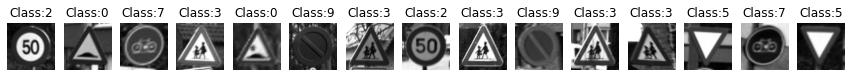

In [11]:

import matplotlib.pyplot as plt
#plotting the images
pltsize=1
plt.figure(figsize=(15*pltsize, pltsize))

for i in range(15):
    plt.subplot(1,15,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(128,128), cmap="gray")
    plt.title('Class:'+str(y_train[i].numpy()))

In [12]:
class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

##Belgium Traffic sign Classasification through SVM##


*   Image Classificaation using SVM is very efficient way of modelling and very rarely used algorithm for image processing and modelling..!!!!

* SVM for image classification

* The image data-set in 2D rather than 4D (as SVM training model accepts dim <=2 so we need to convert the image data to 2D ).

* flattn the images

* SVM algorithm is to be used when their is shortage of data in our dataset .

* *If* we have good amount of image data so, we look further for CNN model.



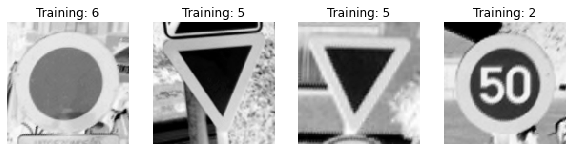

In [ ]:

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    ax.imshow(image[0], cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


In [78]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

# Input data files are available in the "/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/" directory.
# Running:- clicking run or pressing Shift+Enter will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train"]).decode("utf8"))


00001
00002
00003
00004
00005
00006
00007
00008
00009
00010





--- Ploting Images: 


--- Connecting Labels with image data





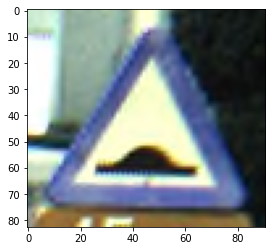

In [110]:
from tqdm import tqdm
DATADIR = '/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Train'
CATEGORIES = ['00001','00002','00003','00004','00005','00006','00007','00008','00009','00010']
IMG_SIZE=128
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [111]:

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()  

In [115]:
print(len(training_data))
lenofimage = len(training_data)

X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)
X.shape

799


(799, 49152)

In [116]:
X = X/255.0

In [117]:
X[1]

array([0.89411765, 1.        , 1.        , ..., 0.3254902 , 0.43921569,
       0.70588235])

In [119]:
y=np.array(y)
y.shape

(799,)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [121]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [122]:
y2 = svc.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.99


In [125]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is")
print(classification_report(y_test,y2))

Accuracy on unknown data is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.93      1.00      0.96        13
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        17
           7       1.00      0.93      0.97        15
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        24

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [126]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [127]:
result

,original,predicted
0,0,0
1,3,3
2,4,4
3,5,5
4,3,3
...,...,...
195,3,3
196,0,0
197,6,6
198,9,9


#Decision-Tree for belgium traffic sign classification  10 classes

1.   Decision Tree model
2.   Loading DT model with flatten data(128X128)=16384 and the desired output classes 10
3.   Multiple accuracy prediction
4.   Training for 200 epochs with decaying learning rate from (0.001 to 0.00001)
5.   Traning accuracy of 100% and validation accuracy of 98%
6.   Visualizing the training and validation.. accuracies and errors
7.   Save the model
8.   Load the model and evaluate the model with test from data-set
9.   Visualizing the falsely and correctly detected images and their classes
10.  Calculating the Precision, Recall and F1 score
2.   Correct detection vs Total items in test set Evaluavation














In [13]:
import torch
import torch.nn as nn


class SDT(nn.Module):
    """Fast implementation of soft decision tree in PyTorch.
    Parameters
    ----------
    input_dim : int
      The number of input dimensions.
    output_dim : int
      The number of output dimensions. For example, for a multi-class
      classification problem with `K` classes, it is set to `K`.
    depth : int, default=5
      The depth of the soft decision tree. Since the soft decision tree is
      a full binary tree, setting `depth` to a large value will drastically
      increases the training and evaluating cost.
    lamda : float, default=1e-3
      The coefficient of the regularization term in the training loss. Please
      refer to the paper on the formulation of the regularization term.
    use_cuda : bool, default=False
      When set to `True`, use GPU to fit the model. Training a soft decision
      tree using CPU could be faster considering the inherent data forwarding
      process.
    Attributes
    ----------
    internal_node_num_ : int
      The number of internal nodes in the tree. Given the tree depth `d`, it
      equals to :math:`2^d - 1`.
    leaf_node_num_ : int
      The number of leaf nodes in the tree. Given the tree depth `d`, it equals
      to :math:`2^d`.
    penalty_list : list
      A list storing the layer-wise coefficients of the regularization term.
    inner_nodes : torch.nn.Sequential
      A container that simulates all internal nodes in the soft decision tree.
      The sigmoid activation function is concatenated to simulate the
      probabilistic routing mechanism.
    leaf_nodes : torch.nn.Linear
      A `nn.Linear` module that simulates all leaf nodes in the tree.
    """

    def __init__(
            self,
            input_dim,
            output_dim,
            depth=5,
            lamda=1e-3,
            use_cuda=False):
        super(SDT, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim

        self.depth = depth
        self.lamda = lamda
        self.device = torch.device("cuda" if use_cuda else "cpu")

        self._validate_parameters()

        self.internal_node_num_ = 2 ** self.depth - 1
        self.leaf_node_num_ = 2 ** self.depth

        # Different penalty coefficients for nodes in different layers
        self.penalty_list = [
            self.lamda * (2 ** (-depth)) for depth in range(0, self.depth)
        ]

        # Initialize internal nodes and leaf nodes, the input dimension on
        # internal nodes is added by 1, serving as the bias.
        self.inner_nodes = nn.Sequential(
            nn.Linear(self.input_dim + 1, self.internal_node_num_, bias=False),
            nn.Sigmoid(),
        )

        self.leaf_nodes = nn.Linear(self.leaf_node_num_,
                                    self.output_dim,
                                    bias=False)

    def forward(self, X, is_training_data=False):
        _mu, _penalty = self._forward(X)
        y_pred = self.leaf_nodes(_mu)

        # When `X` is the training data, the model also returns the penalty
        # to compute the training loss.
        if is_training_data:
            return y_pred, _penalty
        else:
            return y_pred

    def _forward(self, X):
        """Implementation on the data forwarding process."""

        batch_size = X.size()[0]
        X = self._data_augment(X)

        path_prob = self.inner_nodes(X)
        path_prob = torch.unsqueeze(path_prob, dim=2)
        path_prob = torch.cat((path_prob, 1 - path_prob), dim=2)

        _mu = X.data.new(batch_size, 1, 1).fill_(1.0)
        _penalty = torch.tensor(0.0).to(self.device)

        # Iterate through internal odes in each layer to compute the final path
        # probabilities and the regularization term.
        begin_idx = 0
        end_idx = 1

        for layer_idx in range(0, self.depth):
            _path_prob = path_prob[:, begin_idx:end_idx, :]

            # Extract internal nodes in the current layer to compute the
            # regularization term
            _penalty = _penalty + self._cal_penalty(layer_idx, _mu, _path_prob)
            _mu = _mu.view(batch_size, -1, 1).repeat(1, 1, 2)

            _mu = _mu * _path_prob  # update path probabilities

            begin_idx = end_idx
            end_idx = begin_idx + 2 ** (layer_idx + 1)

        mu = _mu.view(batch_size, self.leaf_node_num_)

        return mu, _penalty

    def _cal_penalty(self, layer_idx, _mu, _path_prob):
        """
        Compute the regularization term for internal nodes in different layers.
        """

        penalty = torch.tensor(0.0).to(self.device)

        batch_size = _mu.size()[0]
        _mu = _mu.view(batch_size, 2 ** layer_idx)
        _path_prob = _path_prob.view(batch_size, 2 ** (layer_idx + 1))

        for node in range(0, 2 ** (layer_idx + 1)):
            alpha = torch.sum(
                _path_prob[:, node] * _mu[:, node // 2], dim=0
            ) / torch.sum(_mu[:, node // 2], dim=0)

            coeff = self.penalty_list[layer_idx]

            penalty -= 0.5 * coeff * (torch.log(alpha) + torch.log(1 - alpha))

        return penalty

    def _data_augment(self, X):
        """Add a constant input `1` onto the front of each sample."""
        batch_size = X.size()[0]
        X = X.view(batch_size, -1)
        bias = torch.ones(batch_size, 1).to(self.device)
        X = torch.cat((bias, X), 1)

        return X

    def _validate_parameters(self):

        if not self.depth > 0:
            msg = ("The tree depth should be strictly positive, but got {}"
                   "instead.")
            raise ValueError(msg.format(self.depth))

        if not self.lamda >= 0:
            msg = (
                "The coefficient of the regularization term should not be"
                " negative, but got {} instead."
            )
            raise ValueError(msg.format(self.lamda))

In [18]:

# Declaring the loss function and optimizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SDT(16384,10,9)
model = model.to(device)
print(model)

#Loss Function
loss_fn = torch.nn.CrossEntropyLoss()

#optimizer and learning rate
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);

SDT(
  (inner_nodes): Sequential(
    (0): Linear(in_features=16385, out_features=511, bias=False)
    (1): Sigmoid()
  )
  (leaf_nodes): Linear(in_features=512, out_features=10, bias=False)
)


In [19]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [20]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [17]:
from tqdm.notebook import tqdm
EPOCHS = 450
BATCH_SIZE = 100
LEARNING_RATE = 0.001
NUM_CLASSES = 10
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    if EPOCHS >60:
          optimizer = torch.optim.Adam(model.parameters(), lr=0.0001);
    if EPOCHS >90:
      optimizer = torch.optim.Adam(model.parameters(), lr=0.00001);
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = loss_fn(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in validation_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = loss_fn(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(validation_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(validation_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(validation_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(validation_loader):.3f}')

Begin training.


  0%|          | 0/450 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch 001: | Train Loss: 2.30120 | Val Loss: 2.29937 | Train Acc: 17.900| Val Acc: 41.000
Epoch 002: | Train Loss: 2.29777 | Val Loss: 2.29598 | Train Acc: 53.000| Val Acc: 61.000
Epoch 003: | Train Loss: 2.29416 | Val Loss: 2.29255 | Train Acc: 64.550| Val Acc: 67.400
Epoch 004: | Train Loss: 2.29042 | Val Loss: 2.28899 | Train Acc: 71.750| Val Acc: 68.400
Epoch 005: | Train Loss: 2.28699 | Val Loss: 2.28579 | Train Acc: 74.300| Val Acc: 73.000
Epoch 006: | Train Loss: 2.28382 | Val Loss: 2.28288 | Train Acc: 77.050| Val Acc: 75.400
Epoch 007: | Train Loss: 2.28107 | Val Loss: 2.28040 | Train Acc: 79.900| Val Acc: 79.600
Epoch 008: | Train Loss: 2.27860 | Val Loss: 2.27822 | Train Acc: 80.750| Val Acc: 80.200
Epoch 009: | Train Loss: 2.27647 | Val Loss: 2.27622 | Train Acc: 81.100| Val Acc: 79.200
Epoch 010: | Train Loss: 2.27450 | Val Loss: 2.27448 | Train Acc: 81.500| Val Acc: 80.400
Epoch 011: | Train Loss: 2.27274 | Val Loss: 2.27280 | Train Acc: 82.400| Val Acc: 77.400
Epoch 012:

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

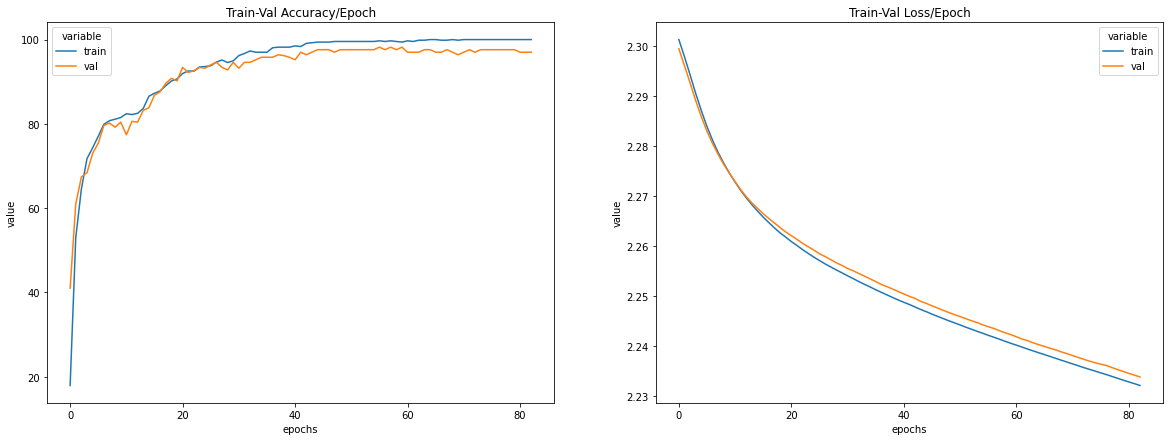

In [18]:
import seaborn as sns
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [19]:
# Save model
torch.save(model.state_dict(), '/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/SDT_model3.ckpt')

In [20]:
# Load the model
loaded_model = SDT(16384,10,9)
loaded_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/SDT_model3.ckpt'))
loaded_model.eval()

SDT(
  (inner_nodes): Sequential(
    (0): Linear(in_features=16385, out_features=511, bias=False)
    (1): Sigmoid()
  )
  (leaf_nodes): Linear(in_features=512, out_features=10, bias=False)
)

In [21]:
# Testing Evaluation 
val_set = torchvision.datasets.ImageFolder('/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Test',transform = transformations)
# test DataLoader
test_loader = torch.utils.data.DataLoader(val_set, batch_size=1, shuffle=True, num_workers=10)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [22]:
# Get input/output from data loader
for (X_test, y_test) in test_loader:
    print('X_test:', X_test.size(), 'type:', X_test.type())
    print('y_test:', y_test.size(), 'type:', y_test.type())
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


X_test: torch.Size([1, 1, 128, 128]) type: torch.FloatTensor
y_test: torch.Size([1]) type: torch.LongTensor


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor(3)
Test Accuracy of the model on test images: 98.0000 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').


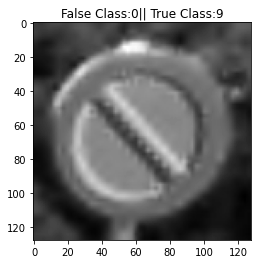

3


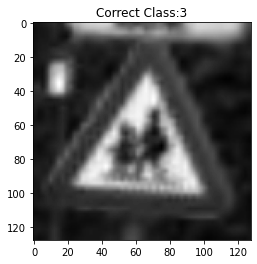

In [23]:
correct = 0
total = 0
false = 0
labelf = 00
label2 =00
label3 =00
img_false=torch.zeros(128,128)
img_true=torch.zeros(128,128)
with torch.no_grad():
  loaded_model.eval()
  for images, labels in test_loader:
    images = images.float()
    # images, labels = images.to(device), labels.to(device)
    outputs = loaded_model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    false += (predicted != labels).sum()
    if (predicted != labels):
      img_false,labelf,label3 = images,predicted, labels
    if (predicted == labels):
      img_True,label2 = images,labels,
print(false)
print('Test Accuracy of the model on test images: %.4f %%' % (100 * correct // total))


#for (X_false, y_false) in test_loader:
#    print('X_test:', X_test.size(), 'type:', X_test.type())
#    print('y_test:', y_test.size(), 'type:', y_test.type())
#    break

#img_false=img_false.squeeze()
img_false=img_false.squeeze()

plt.figure()
plt.imshow(img_false,cmap="gray")
plt.title('False Class:'+ str(labelf.item())+'|| True Class:'+str(label3.item()))
plt.show()

img_True=img_True.squeeze()
print(label2.item())
plt.figure()
plt.imshow(img_True,cmap="gray")
plt.title('Correct Class:'+ str(label2.item()))
plt.show()


In [24]:
A=correct.item()+total
precision=correct.item()/A
print('precision:',precision)
B=correct.item()+(total+(total-correct.item()))
Recall= correct.item()/B
print('Recall:',Recall)
C=Recall*precision
D=Recall+precision
F1_Score = 2 *(C/D)
print('F1 Score:',F1_Score)

precision: 0.49624060150375937
Recall: 0.4925373134328358
F1 Score: 0.49438202247191004


In [25]:
print("Total correctly detected test samples: ",correct.item())
print("Total test samples:", total)

Total correctly detected test samples:  198
Total test samples: 201


# Modified Vision Transformer for small dataset Belgium Traffic Sign Classification 10 Classes

##Modified Vision transformer for small data-set##

> Modified for single channel images

>  Shifted Patch Tokenization SPT

> Locality Self-Attention LSA

1.  Loading Vision Transformer for small dataset (image_size=128,patch_size=128,num_classes=10,dim=6,depth=6,heads=30,mlp_dim=2048)
2.  Multiple accuracy prediction
3.  Training for 170 epochs with decaying learning rate from (0.001 to 0.0001)
4.  Traning accuracy of 100% and validation accuracy of 99.4%
5.  Visualizing the training and validation.. accuracies and errors
6.  Save the model
7.  Load the model and evaluate the model with test from data-set
8.  Visualizing the falsely and correctly detected images and their classes
9.  Calculating the Precision, Recall and F1 score
10. Correct detection vs Total items in test set Evaluavation

In [26]:
#Vision Transformers
!pip install vit-pytorch

     |████████████████████████████████| 50 kB 4.5 MB/s 


In [27]:
#Vision Transformer
from math import sqrt
import torch
import torch.nn.functional as F
from torch import nn

from einops import rearrange, repeat
from einops.layers.torch import Rearrange

# helpers

def pair(t):
    return t if isinstance(t, tuple) else (t, t)

# classes

class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn
    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout = 0.):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout)
        )
    def forward(self, x):
        return self.net(x)

class LSA(nn.Module):
    def __init__(self, dim, heads = 8, dim_head = 64, dropout = 0.):
        super().__init__()
        inner_dim = dim_head *  heads
        self.heads = heads
        self.temperature = nn.Parameter(torch.log(torch.tensor(dim_head ** -0.5)))

        self.attend = nn.Softmax(dim = -1)
        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias = False)

        self.to_out = nn.Sequential(
            nn.Linear(inner_dim, dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        qkv = self.to_qkv(x).chunk(3, dim = -1)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h = self.heads), qkv)

        dots = torch.matmul(q, k.transpose(-1, -2)) * self.temperature.exp()

        mask = torch.eye(dots.shape[-1], device = dots.device, dtype = torch.bool)
        mask_value = -torch.finfo(dots.dtype).max
        dots = dots.masked_fill(mask, mask_value)

        attn = self.attend(dots)

        out = torch.matmul(attn, v)
        out = rearrange(out, 'b h n d -> b n (h d)')
        return self.to_out(out)

class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim, dropout = 0.):
        super().__init__()
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                PreNorm(dim, LSA(dim, heads = heads, dim_head = dim_head, dropout = dropout)),
                PreNorm(dim, FeedForward(dim, mlp_dim, dropout = dropout))
            ]))
    def forward(self, x):
        for attn, ff in self.layers:
            x = attn(x) + x
            x = ff(x) + x
        return x

class SPT(nn.Module):
    def __init__(self, *, dim, patch_size, channels = 3):
        super().__init__()
        patch_dim = patch_size * patch_size * 5 * channels

        self.to_patch_tokens = nn.Sequential(
            Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = patch_size, p2 = patch_size),
            nn.LayerNorm(patch_dim),
            nn.Linear(patch_dim, dim)
        )

    def forward(self, x):
        shifts = ((1, -1, 0, 0), (-1, 1, 0, 0), (0, 0, 1, -1), (0, 0, -1, 1))
        shifted_x = list(map(lambda shift: F.pad(x, shift), shifts))
        x_with_shifts = torch.cat((x, *shifted_x), dim = 1)
        return self.to_patch_tokens(x_with_shifts)

class ViT(nn.Module):
    def __init__(self, *, image_size, patch_size, num_classes, dim, depth, heads, mlp_dim, pool = 'cls', channels = 1, dim_head = 64, dropout = 0., emb_dropout = 0.):
        super().__init__()
        image_height, image_width = pair(image_size)
        patch_height, patch_width = pair(patch_size)

        assert image_height % patch_height == 0 and image_width % patch_width == 0, 'Image dimensions must be divisible by the patch size.'

        num_patches = (image_height // patch_height) * (image_width // patch_width)
        patch_dim = channels * patch_height * patch_width
        assert pool in {'cls', 'mean'}, 'pool type must be either cls (cls token) or mean (mean pooling)'

        self.to_patch_embedding = SPT(dim = dim, patch_size = patch_size, channels = channels)

        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.dropout = nn.Dropout(emb_dropout)

        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim, dropout)

        self.pool = pool
        self.to_latent = nn.Identity()

        self.mlp_head = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, num_classes)
        )

    def forward(self, img):
        x = self.to_patch_embedding(img)
        b, n, _ = x.shape

        cls_tokens = repeat(self.cls_token, '() n d -> b n d', b = b)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embedding[:, :(n + 1)]
        x = self.dropout(x)

        x = self.transformer(x)

        x = x.mean(dim = 1) if self.pool == 'mean' else x[:, 0]

        x = self.to_latent(x)
        return self.mlp_head(x)

In [28]:
#vision Transformer
model = ViT(image_size=128,patch_size=128,num_classes=10,dim=6,depth=6,heads=30,mlp_dim=2048)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
print(model)

#criterion = # YOUR CODE HERE : Explore and declare loss function
# loss_fn = torch.nn.BCELoss()
loss_fn = torch.nn.CrossEntropyLoss()

#optimizer and learning rate
learning_rate = 0.001;
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);

ViT(
  (to_patch_embedding): SPT(
    (to_patch_tokens): Sequential(
      (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=128, p2=128)
      (1): LayerNorm((81920,), eps=1e-05, elementwise_affine=True)
      (2): Linear(in_features=81920, out_features=6, bias=True)
    )
  )
  (dropout): Dropout(p=0.0, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): PreNorm(
          (norm): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
          (fn): LSA(
            (attend): Softmax(dim=-1)
            (to_qkv): Linear(in_features=6, out_features=5760, bias=False)
            (to_out): Sequential(
              (0): Linear(in_features=1920, out_features=6, bias=True)
              (1): Dropout(p=0.0, inplace=False)
            )
          )
        )
        (1): PreNorm(
          (norm): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
          (fn): FeedForward(
            (net): Sequential(
              (0): Li

In [29]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [30]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [31]:
from tqdm.notebook import tqdm
EPOCHS = 85
BATCH_SIZE = 32
LEARNING_RATE = 0.001
NUM_CLASSES = 10
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    if EPOCHS >20:
          optimizer = torch.optim.Adam(model.parameters(), lr=0.0001);
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = loss_fn(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in validation_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = loss_fn(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(validation_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(validation_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(validation_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(validation_loader):.3f}')

Begin training.


  0%|          | 0/85 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch 001: | Train Loss: 2.08171 | Val Loss: 1.73168 | Train Acc: 33.800| Val Acc: 52.800
Epoch 002: | Train Loss: 1.64235 | Val Loss: 1.51177 | Train Acc: 58.200| Val Acc: 67.800
Epoch 003: | Train Loss: 1.46456 | Val Loss: 1.38606 | Train Acc: 68.400| Val Acc: 71.200
Epoch 004: | Train Loss: 1.40502 | Val Loss: 1.36319 | Train Acc: 68.750| Val Acc: 69.000
Epoch 005: | Train Loss: 1.36213 | Val Loss: 1.31878 | Train Acc: 70.350| Val Acc: 72.400
Epoch 006: | Train Loss: 1.32365 | Val Loss: 1.30839 | Train Acc: 71.200| Val Acc: 71.800
Epoch 007: | Train Loss: 1.30647 | Val Loss: 1.29681 | Train Acc: 70.350| Val Acc: 72.400
Epoch 008: | Train Loss: 1.29270 | Val Loss: 1.29216 | Train Acc: 70.950| Val Acc: 71.000
Epoch 009: | Train Loss: 1.27917 | Val Loss: 1.26480 | Train Acc: 71.150| Val Acc: 76.200
Epoch 010: | Train Loss: 1.26521 | Val Loss: 1.25765 | Train Acc: 71.800| Val Acc: 73.000
Epoch 011: | Train Loss: 1.26001 | Val Loss: 1.26378 | Train Acc: 70.800| Val Acc: 73.200
Epoch 012:

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

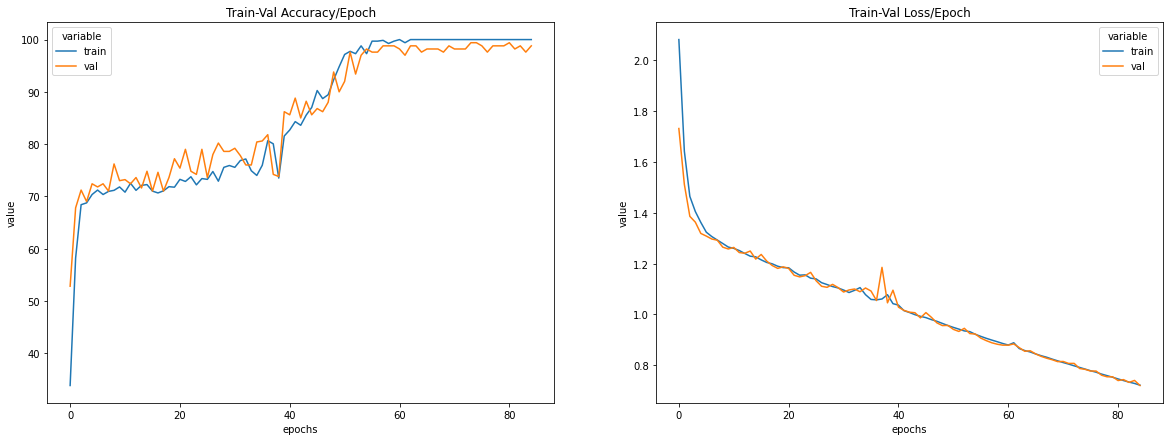

In [32]:
import seaborn as sns
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [33]:
# Save model
torch.save(model.state_dict(), '/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/Vision_transformer_model5.ckpt')

In [34]:
# Load the model
loaded_model = ViT(image_size=128,patch_size=128,num_classes=10,dim=6,depth=6,heads=30,mlp_dim=2048)
loaded_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/Vision_transformer_model5.ckpt', map_location=torch.device('cpu')))
loaded_model.eval()

ViT(
  (to_patch_embedding): SPT(
    (to_patch_tokens): Sequential(
      (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=128, p2=128)
      (1): LayerNorm((81920,), eps=1e-05, elementwise_affine=True)
      (2): Linear(in_features=81920, out_features=6, bias=True)
    )
  )
  (dropout): Dropout(p=0.0, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0): ModuleList(
        (0): PreNorm(
          (norm): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
          (fn): LSA(
            (attend): Softmax(dim=-1)
            (to_qkv): Linear(in_features=6, out_features=5760, bias=False)
            (to_out): Sequential(
              (0): Linear(in_features=1920, out_features=6, bias=True)
              (1): Dropout(p=0.0, inplace=False)
            )
          )
        )
        (1): PreNorm(
          (norm): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
          (fn): FeedForward(
            (net): Sequential(
              (0): Li

In [35]:
# Testing Evaluation for CNN model
val_set = torchvision.datasets.ImageFolder('/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Test',transform = transformations)
# test DataLoader
test_loader = torch.utils.data.DataLoader(val_set, batch_size=1, shuffle=True, num_workers=10)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [36]:
# Get input/output from data loader
for (X_test, y_test) in test_loader:
    print('X_test:', X_test.size(), 'type:', X_test.type())
    print('y_test:', y_test.size(), 'type:', y_test.type())
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


X_test: torch.Size([1, 1, 128, 128]) type: torch.FloatTensor
y_test: torch.Size([1]) type: torch.LongTensor


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor(14)
Test Accuracy of the model on test images: 93.0000 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').


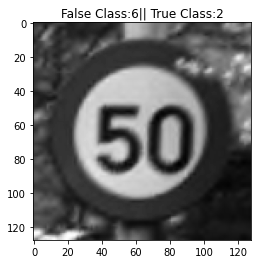

8


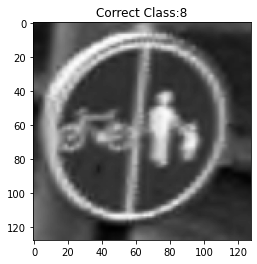

In [37]:
correct = 0
total = 0
false = 0
labelf = 00
label2 =00
label3 =00
img_false=torch.zeros(128,128)
img_true=torch.zeros(128,128)
with torch.no_grad():
  loaded_model.eval()
  for images, labels in test_loader:
    images = images.float()
    # images, labels = images.to(device), labels.to(device)
    outputs = loaded_model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    false += (predicted != labels).sum()
    if (predicted != labels):
      img_false,labelf,label3 = images,predicted, labels
    if (predicted == labels):
      img_True,label2 = images,labels,
print(false)
print('Test Accuracy of the model on test images: %.4f %%' % (100 * correct // total))


#for (X_false, y_false) in test_loader:
#    print('X_test:', X_test.size(), 'type:', X_test.type())
#    print('y_test:', y_test.size(), 'type:', y_test.type())
#    break

#img_false=img_false.squeeze()
img_false=img_false.squeeze()

plt.figure()
plt.imshow(img_false,cmap="gray")
plt.title('False Class:'+ str(labelf.item())+'|| True Class:'+str(label3.item()))
plt.show()

img_True=img_True.squeeze()
print(label2.item())
plt.figure()
plt.imshow(img_True,cmap="gray")
plt.title('Correct Class:'+ str(label2.item()))
plt.show()


In [38]:
A=correct.item()+total
precision=correct.item()/A
print('precision:',precision)
B=correct.item()+(total+(total-correct.item()))
Recall= correct.item()/B
print('Recall:',Recall)
C=Recall*precision
D=Recall+precision
F1_Score = 2 *(C/D)
print('F1 Score:',F1_Score)

precision: 0.48195876288659795
Recall: 0.4651741293532338
F1 Score: 0.4734177215189873


In [39]:
print(correct, total)

tensor(187) 201


## Convolution Model on Belgium Traffic Sign Classification 10 classes##


*   Same as Transformer and SDT



In [40]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional Layers
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2))        
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        # Dropout to avoid overfitting
        self.drop_out = nn.Dropout()

        # Fully connected layers
        self.fc1 = nn.Linear(4*4*128, 512)
        self.fc2 = nn.Linear(512, 62)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)

        # Flatten
        out = out.view(out.size(0), -1)

        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [41]:
# Declaring the loss function and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN()
model = model.to(device)
print(model)

#Loss Function
loss_fn = torch.nn.CrossEntropyLoss()

#optimizer and learning rate
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d

In [42]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [43]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [44]:
from tqdm.notebook import tqdm
EPOCHS = 10
BATCH_SIZE = 32
LEARNING_RATE = 0.001
NUM_CLASSES = 10
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = loss_fn(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in validation_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = loss_fn(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(validation_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(validation_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(validation_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(validation_loader):.3f}')

Begin training.


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch 001: | Train Loss: 2.41926 | Val Loss: 2.97061 | Train Acc: 33.700| Val Acc: 16.200
Epoch 002: | Train Loss: 0.51146 | Val Loss: 0.50365 | Train Acc: 83.000| Val Acc: 82.800
Epoch 003: | Train Loss: 0.12513 | Val Loss: 0.09386 | Train Acc: 95.650| Val Acc: 96.400
Epoch 004: | Train Loss: 0.06068 | Val Loss: 0.04952 | Train Acc: 98.200| Val Acc: 98.800
Epoch 005: | Train Loss: 0.02256 | Val Loss: 0.06148 | Train Acc: 99.550| Val Acc: 98.200
Epoch 006: | Train Loss: 0.02291 | Val Loss: 0.03258 | Train Acc: 99.100| Val Acc: 99.400
Epoch 007: | Train Loss: 0.01398 | Val Loss: 0.04561 | Train Acc: 99.550| Val Acc: 98.200
Epoch 008: | Train Loss: 0.00375 | Val Loss: 0.01474 | Train Acc: 100.000| Val Acc: 99.400
Epoch 009: | Train Loss: 0.00657 | Val Loss: 0.03081 | Train Acc: 99.850| Val Acc: 98.800
Epoch 010: | Train Loss: 0.00182 | Val Loss: 0.00518 | Train Acc: 100.000| Val Acc: 100.000


Text(0.5, 1.0, 'Train-Val Loss/Epoch')

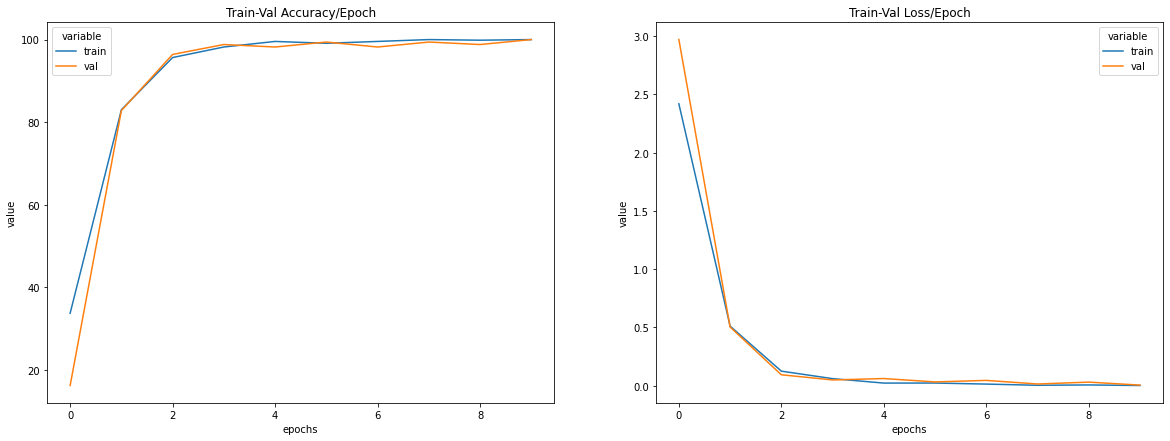

In [45]:
import seaborn as sns
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [46]:
# Save model
torch.save(model.state_dict(), '/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/conv_net_model3.ckpt')

In [47]:
# Load the model
loaded_model = CNN()
loaded_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/conv_net_model3.ckpt'))
loaded_model.eval()

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d

In [48]:
# Testing Evaluation for CNN model
val_set = torchvision.datasets.ImageFolder('/content/gdrive/MyDrive/Colab Notebooks/Belgium_TS/CS893 Sp2022 A1 Dataset/Test',transform = transformations)
# test DataLoader
test_loader = torch.utils.data.DataLoader(val_set, batch_size=1, shuffle=True, num_workers=10)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [49]:
# Get input/output from data loader
for (X_test, y_test) in test_loader:
    print('X_test:', X_test.size(), 'type:', X_test.type())
    print('y_test:', y_test.size(), 'type:', y_test.type())
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


X_test: torch.Size([1, 1, 128, 128]) type: torch.FloatTensor
y_test: torch.Size([1]) type: torch.LongTensor


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor(2)
Test Accuracy of the model on test images: 99.0000 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').


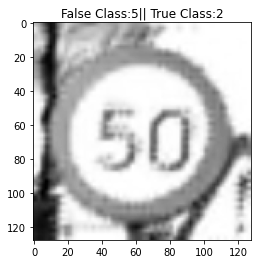

3


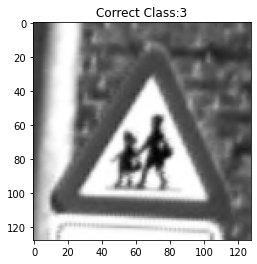

In [50]:
correct = 0
total = 0
false = 0
labelf = 00
label2 =00
label3 =00
img_false=torch.zeros(128,128)
img_true=torch.zeros(128,128)
with torch.no_grad():
  loaded_model.eval()
  for images, labels in test_loader:
    images = images.float()
    # images, labels = images.to(device), labels.to(device)
    outputs = loaded_model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    false += (predicted != labels).sum()
    if (predicted != labels):
      img_false,labelf,label3 = images,predicted, labels
    if (predicted == labels):
      img_True,label2 = images,labels,
print(false)
print('Test Accuracy of the model on test images: %.4f %%' % (100 * correct // total))


#for (X_false, y_false) in test_loader:
#    print('X_test:', X_test.size(), 'type:', X_test.type())
#    print('y_test:', y_test.size(), 'type:', y_test.type())
#    break

#img_false=img_false.squeeze()
img_false=img_false.squeeze()

plt.figure()
plt.imshow(img_false,cmap="gray")
plt.title('False Class:'+ str(labelf.item())+'|| True Class:'+str(label3.item()))
plt.show()
#print('NO False Class Detected for CNN in Test Exampels')
img_True=img_True.squeeze()
print(label2.item())
plt.figure()
plt.imshow(img_True,cmap="gray")
plt.title('Correct Class:'+ str(label2.item()))
plt.show()


In [51]:
A=correct.item()+total
precision=correct.item()/A
print('precision:',precision)
B=correct.item()+(total+(total-correct.item()))
Recall= correct.item()/B
print('Recall:',Recall)
C=Recall*precision
D=Recall+precision
F1_Score = 2 *(C/D)
print('F1 Score:',F1_Score)

precision: 0.4975
Recall: 0.49502487562189057
F1 Score: 0.4962593516209477


In [52]:
print(correct, total)

tensor(199) 201
